In [1]:
%matplotlib widget

from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [8, 8]

def show_images(images: List[Tuple]) -> None:
    n: int = len(images)
    f = plt.figure()
    # f.set_size_inches(18.5, 10.5)
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i][0], cmap="hot")
        plt.title(images[i][1])
        plt.colorbar(orientation="horizontal")

    plt.show()

1.2246467991473532e-16
-1.0
(1+0.2400000000000001j)


[[ 9311.931  14387.207  23476.924  ... -5923.721  -4383.5054  1170.8065]
 [14489.306  29167.645  27494.463  ... -1159.5841  2232.4912  3953.9832]
 [24941.523  22160.531  14907.76   ... -1616.1321  -533.5809  -667.2773]
 ...
 [11415.279   2980.644   6922.3276 ... 19699.271  14691.714  13131.874 ]
 [10403.65    6993.8164  5792.9854 ... 18068.242  24845.92   18027.633 ]
 [11573.567   8994.691   5920.849  ...  8584.3545 14143.052   3794.2754]]
[[10558.35563739 15499.46562822 24852.60691825 ... -5804.19158536
  -3580.54651773  1775.83524793]
 [15734.56247479 30395.56705128 29064.37613755 ...  -841.64903982
   3049.29964951  4525.65257298]
 [26184.88820456 23444.10410096 16093.58598863 ... -1020.53725244
    -50.61020128  -628.10267477]
 ...
 [12317.6342349   3017.24653043  6811.26117605 ... 20050.6704792
  15110.8792891  14018.06326871]
 [10938.81340813  7663.84531487  6688.57135157 ... 18642.08464873
  25621.9522225  19021.49594843]
 [11378.79587405  9829.26635007  6466.87861489 ...  9231.

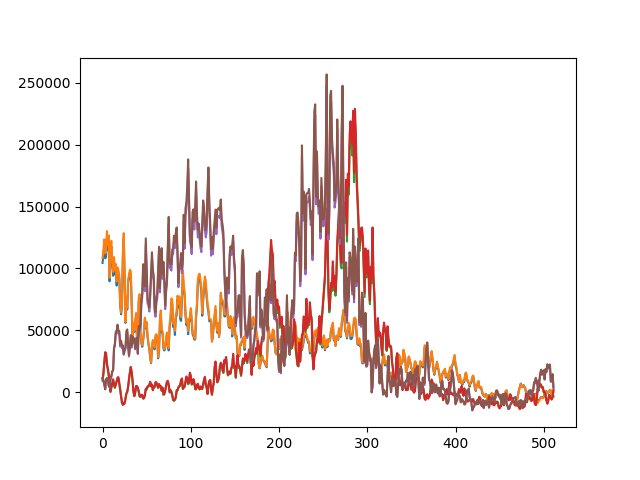

In [4]:
images = []

cuda_file = "../datasets/gleam_small/direct_image.bin"
cuda_image = np.fromfile(cuda_file, dtype=np.float32)
cuda_image = cuda_image.reshape(512, 512)
print(cuda_image)
# cuda_image = np.fliplr(cuda_image)
images.append((cuda_image, "CUDA"))
# plt.imshow(cuda_image)
# plt.colorbar()
# plt.show()

py_file = "../datasets/gleam_small/idft_ts_0_to_29.img"
# py_file = "../datasets/gleam_small/idft_test.img"
py_image = np.fromfile(py_file, dtype=np.float64)
py_image = py_image.reshape(512, 512)
print(py_image)
images.append((py_image, "Python"))
# plt.imshow(py_image)
# plt.colorbar()
# plt.show()

diff = np.absolute(cuda_image - py_image)
print(np.sum(cuda_image))
print(np.sum(py_image))
print(np.sum(diff))
images.append((diff, "Diff"))

dist = np.linalg.norm(cuda_image - py_image)
print(dist)

# show_images(images)

plt.plot(cuda_image[511])
plt.plot(py_image[511])
plt.show()